# Explore here

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

url = "https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv"
total_data = pd.read_csv(url, sep=";")  
total_data.head()

Matplotlib is building the font cache; this may take a moment.


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
total_data = total_data.drop_duplicates()
print("Antes:", total_data.shape)
print("Después:", total_data.shape)

Antes: (41176, 21)
Después: (41176, 21)


Analisis de resultado:
los df antes y despues son iguales, quiere decir que no hay duplicados

In [ ]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null  floa

Analisis de resultado:
me indica 0 Nulls en la variables

In [ ]:
#data set con outlaiers
total_data.drop(['contact','day_of_week','month','duration','nr.employed','previous','pdays'], axis = 1, inplace = True)
total_data.head()


,age,job,marital,education,default,housing,loan,campaign,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,y
0,56,housemaid,married,basic.4y,no,no,no,1,nonexistent,1.1,93.994,-36.4,4.857,no
1,57,services,married,high.school,unknown,no,no,1,nonexistent,1.1,93.994,-36.4,4.857,no
2,37,services,married,high.school,no,yes,no,1,nonexistent,1.1,93.994,-36.4,4.857,no
3,40,admin.,married,basic.6y,no,no,no,1,nonexistent,1.1,93.994,-36.4,4.857,no
4,56,services,married,high.school,no,no,yes,1,nonexistent,1.1,93.994,-36.4,4.857,no


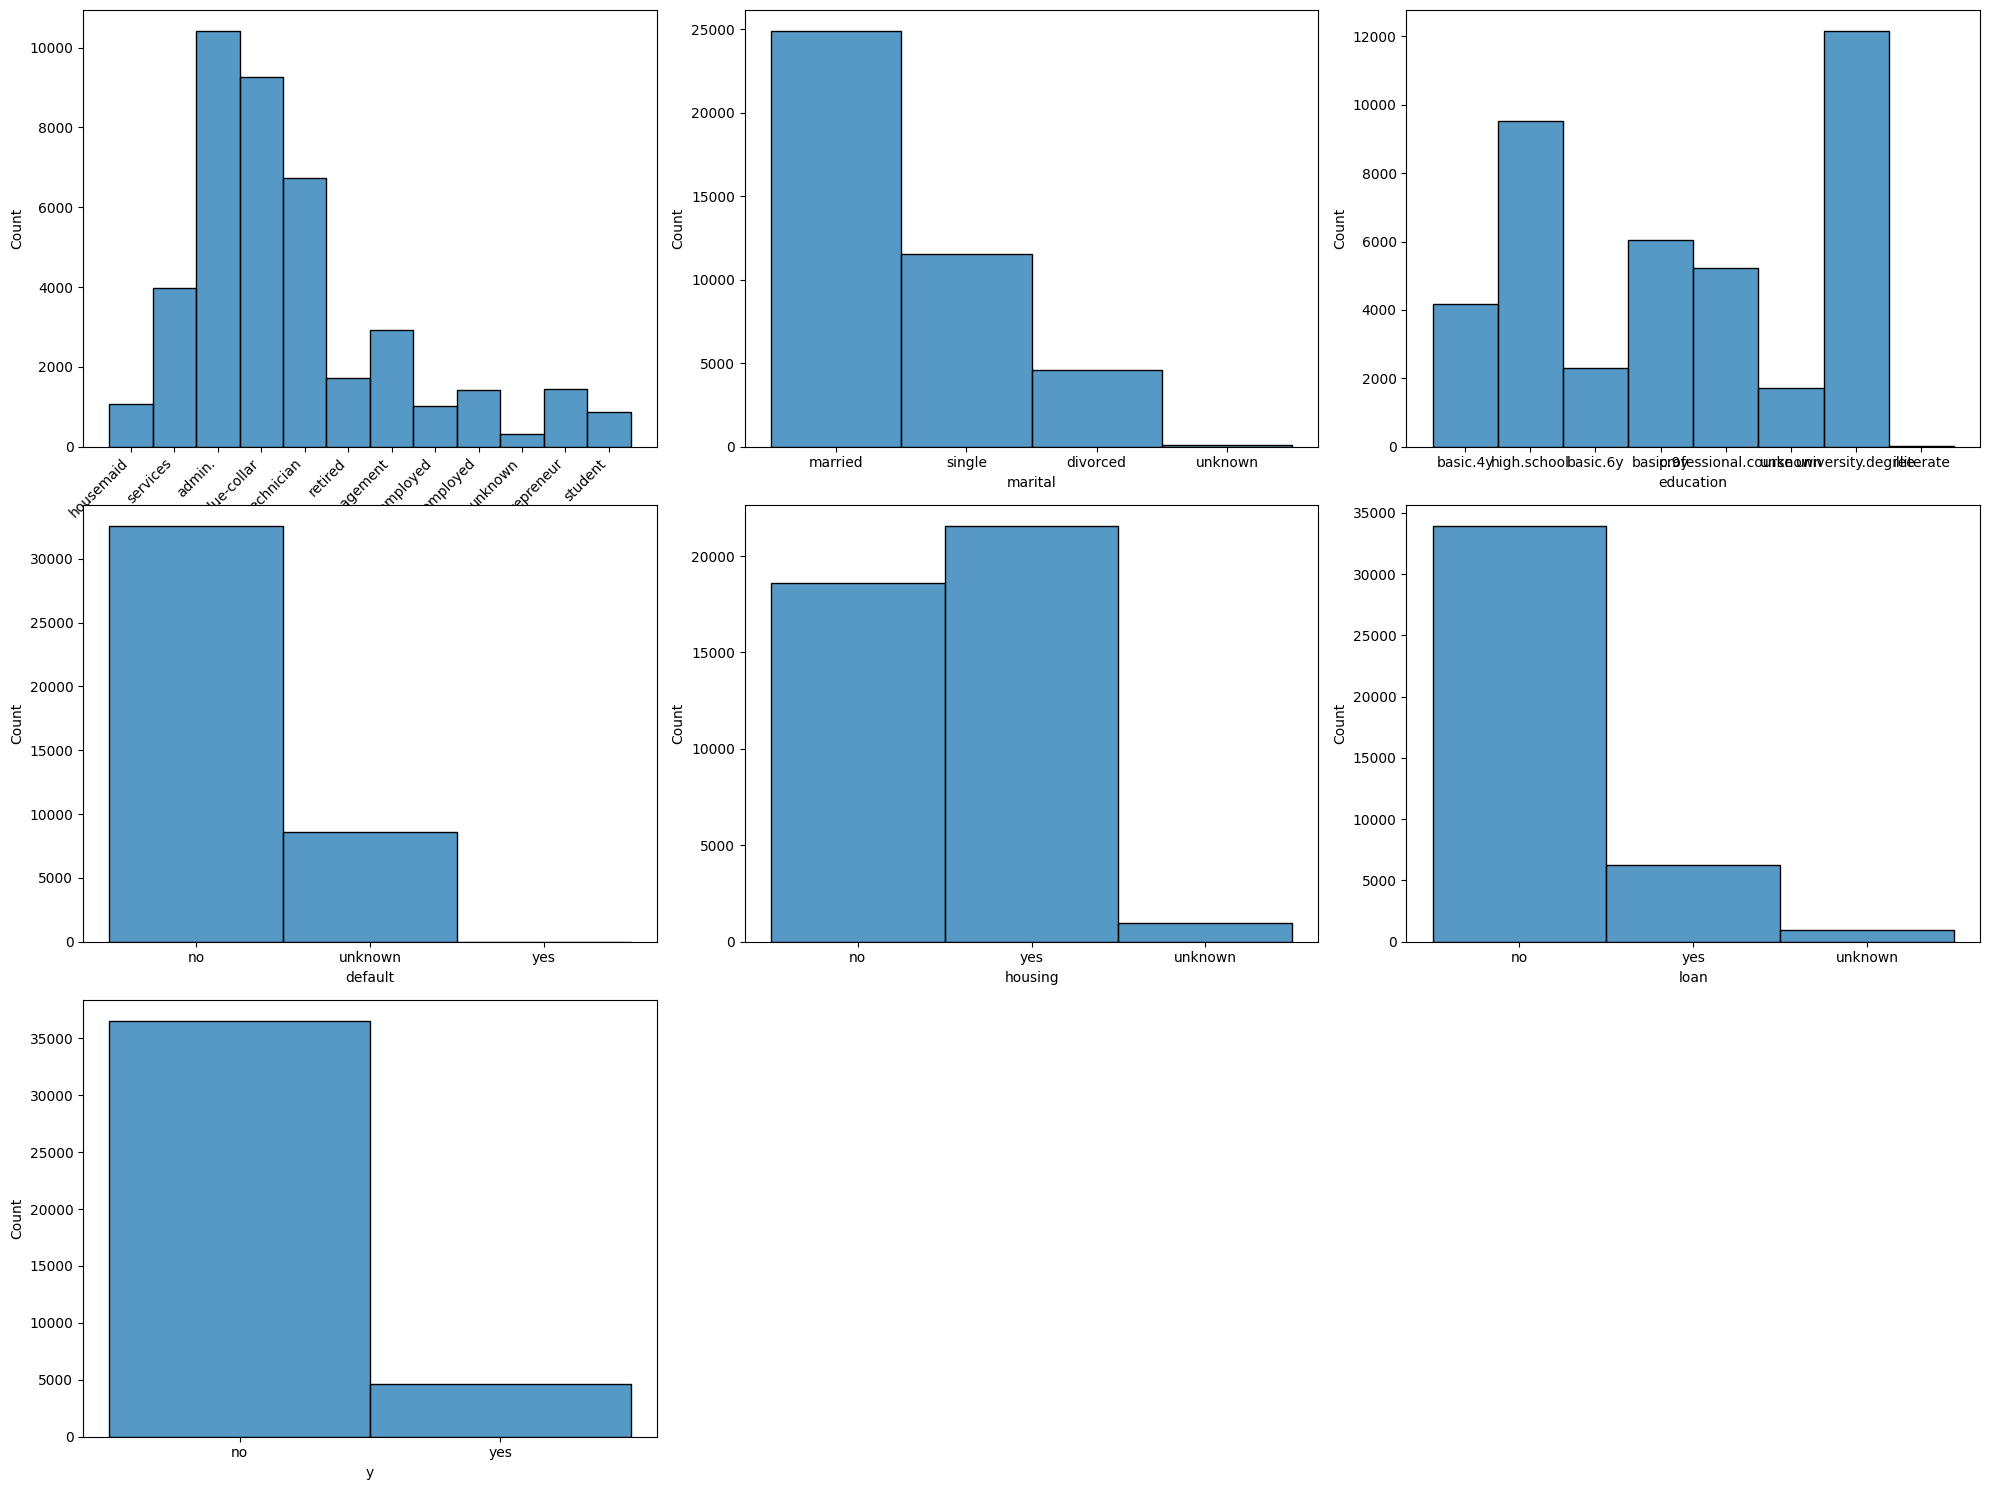

In [ ]:
fig, axis = plt.subplots(3, 3, figsize=(20,15))

sns.histplot(ax = axis[0,0], data = total_data, x = "job")
sns.histplot(ax = axis[0,1], data = total_data, x = "marital")
sns.histplot(ax = axis[0,2], data = total_data, x = "education")
sns.histplot(ax = axis[1,0], data = total_data, x = "default")
sns.histplot(ax = axis[1,1], data = total_data, x = "housing")
sns.histplot(ax = axis[1,2], data = total_data, x = "loan")
sns.histplot(ax = axis[2,0], data = total_data, x = "y")
fig.delaxes(axis[2, 1])
fig.delaxes(axis[2, 2])

plt.tight_layout()
plt.setp(axis[0,0].get_xticklabels(), rotation=45, ha='right')
plt.setp(axis[0,0].get_xticklabels(), rotation=45, ha='right')

plt.show()

Analisis de resultado: 
1. job:muestra la distribucion de los diferentes tipos de trabajo de los clientes.  El la muestra hay más personas en categorías como admin , blue-collar y technician. Esto me da una idea de las profesiones predominan en la muestra.

2. marital
En marital, normalmente la mayoría son "married", seguidos de "single" y "divorced".

3. education
Hay varias categorias como university.degree, high.school, basic.9y. Si hay muchas personas con estudios universitarios o secundarios, puede influir en la respuesta a la campaña.

4. default
La mayoría de los clientes suelen no tener impagos ("no"), y muy pocos tienen "yes" o "unknown". Si hay muy pocos con impagos, esta variable podria tener poco peso en el modelo

5. housing
Se ve cuantos tienen hipoteca ("yes"), cuántos no ("no") y cuántos son "unknown". Si la mayoría tiene hipoteca, puede indicar un perfil financiero mas comprometido.

6. loan
Similar a housing, pero para préstamos personales. Normalmente la mayoría no tiene préstamos personales.



In [ ]:
# Variables numéricas
numericas = total_data.select_dtypes(include=['number']).columns.tolist()
print("Variables numéricas:", numericas)

# Variables no numéricas (categóricas, texto, etc.)
no_numericas = total_data.select_dtypes(exclude=['number']).columns.tolist()
print("Variables no numéricas:", no_numericas)

Variables numéricas: ['age', 'campaign', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m']
Variables no numéricas: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'poutcome', 'y']


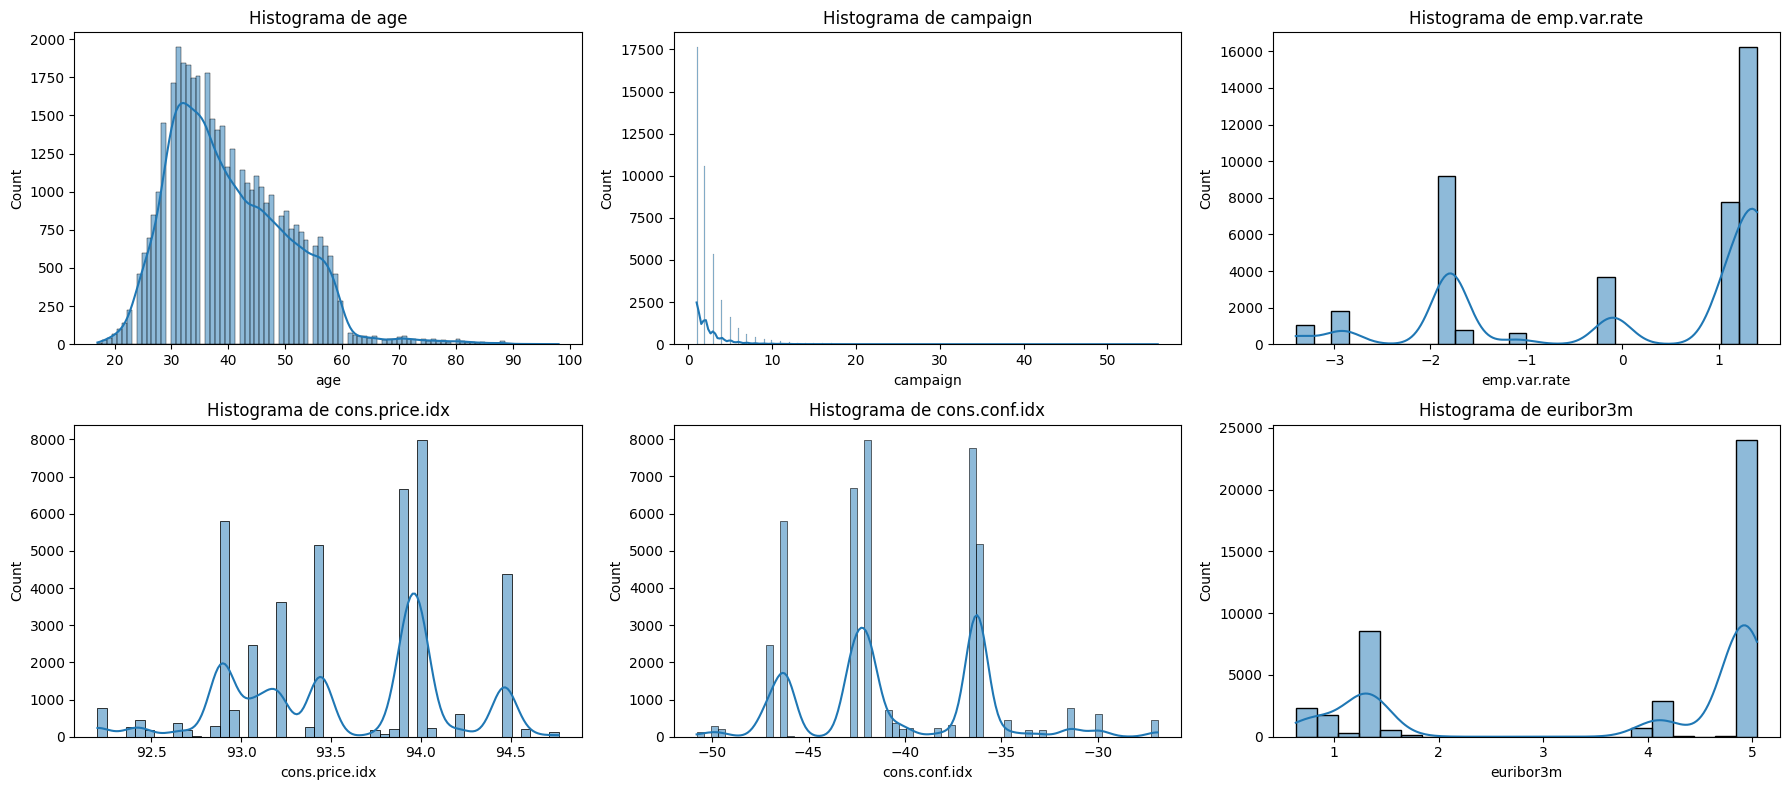

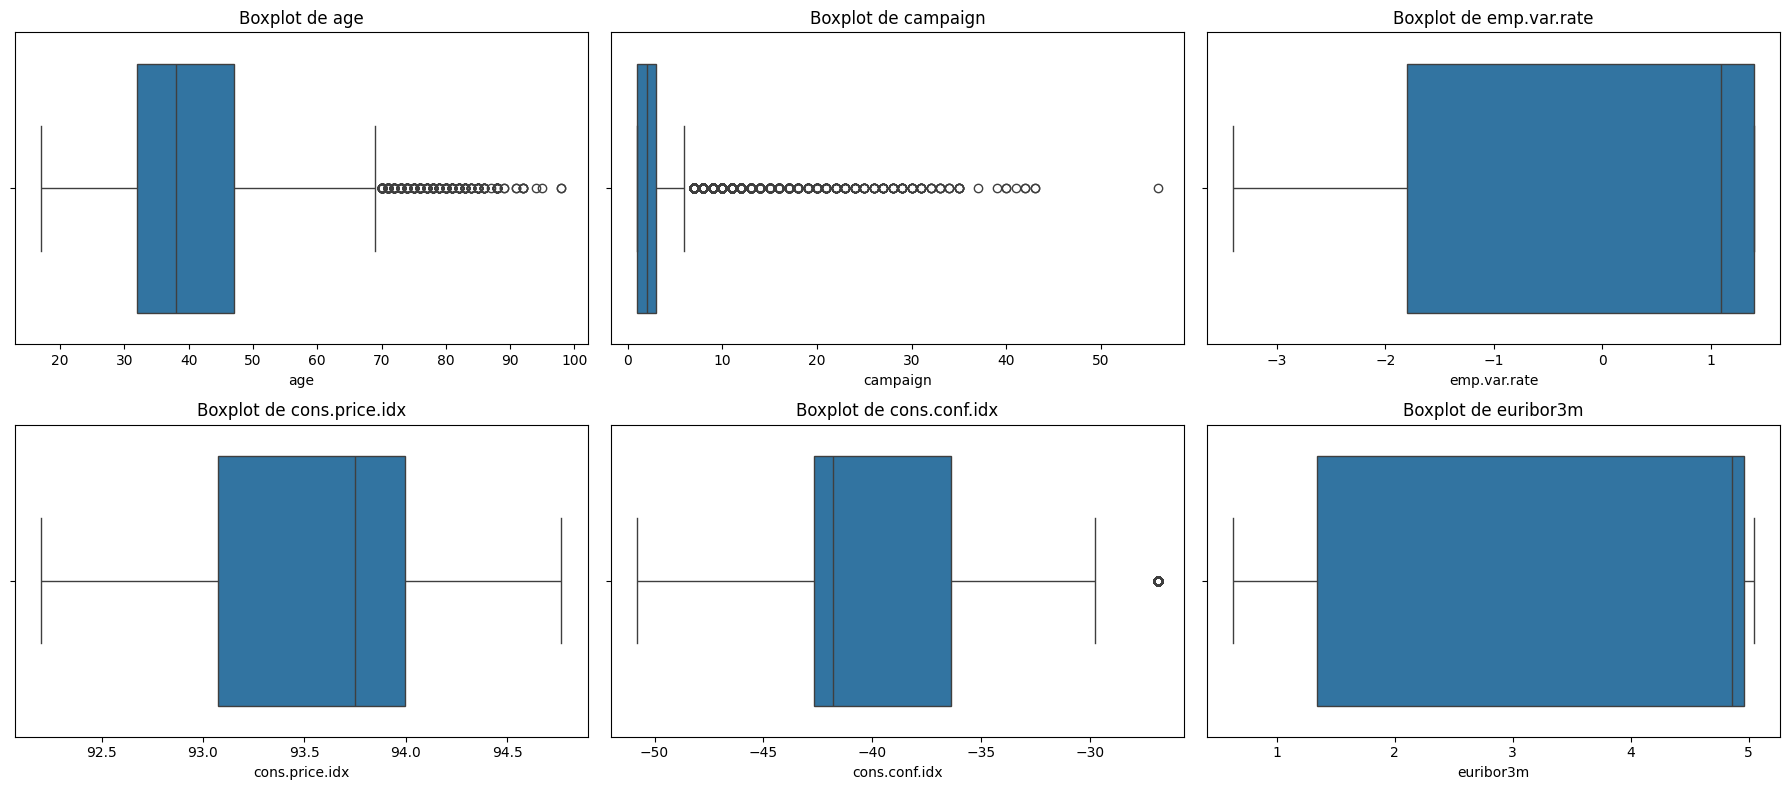

Descripción de age:
count    41176.00000
mean        40.02380
std         10.42068
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64

Descripción de campaign:
count    41176.000000
mean         2.567879
std          2.770318
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         56.000000
Name: campaign, dtype: float64

Descripción de emp.var.rate:
count    41176.000000
mean         0.081922
std          1.570883
min         -3.400000
25%         -1.800000
50%          1.100000
75%          1.400000
max          1.400000
Name: emp.var.rate, dtype: float64

Descripción de cons.price.idx:
count    41176.000000
mean        93.575720
std          0.578839
min         92.201000
25%         93.075000
50%         93.749000
75%         93.994000
max         94.767000
Name: cons.price.idx, dtype: float64

Descripción de cons.conf.idx:
count    41176.000000
mean       -40

In [ ]:
# histogramas variables Numericas 
fig, axes = plt.subplots(2, 3, figsize=(18, 8))

sns.histplot(data=total_data, x='age', ax=axes[0, 0], kde=True)
axes[0, 0].set_title('Histograma de age')

sns.histplot(data=total_data, x='campaign', ax=axes[0, 1], kde=True)
axes[0, 1].set_title('Histograma de campaign')

sns.histplot(data=total_data, x='emp.var.rate', ax=axes[0, 2], kde=True)
axes[0, 2].set_title('Histograma de emp.var.rate')

sns.histplot(data=total_data, x='cons.price.idx', ax=axes[1, 0], kde=True)
axes[1, 0].set_title('Histograma de cons.price.idx')

sns.histplot(data=total_data, x='cons.conf.idx', ax=axes[1, 1], kde=True)
axes[1, 1].set_title('Histograma de cons.conf.idx')

sns.histplot(data=total_data, x='euribor3m', ax=axes[1, 2], kde=True)
axes[1, 2].set_title('Histograma de euribor3m')

plt.tight_layout()
plt.show()

# boxplots variables Numericas 
fig, axes = plt.subplots(2, 3, figsize=(18, 8))

sns.boxplot(data=total_data, x='age', ax=axes[0, 0])
axes[0, 0].set_title('Boxplot de age')

sns.boxplot(data=total_data, x='campaign', ax=axes[0, 1])
axes[0, 1].set_title('Boxplot de campaign')

sns.boxplot(data=total_data, x='emp.var.rate', ax=axes[0, 2])
axes[0, 2].set_title('Boxplot de emp.var.rate')

sns.boxplot(data=total_data, x='cons.price.idx', ax=axes[1, 0])
axes[1, 0].set_title('Boxplot de cons.price.idx')

sns.boxplot(data=total_data, x='cons.conf.idx', ax=axes[1, 1])
axes[1, 1].set_title('Boxplot de cons.conf.idx')

sns.boxplot(data=total_data, x='euribor3m', ax=axes[1, 2])
axes[1, 2].set_title('Boxplot de euribor3m')

plt.tight_layout()
plt.show()
print("Descripción de age:")
print(total_data['age'].describe())
print("\nDescripción de campaign:")
print(total_data['campaign'].describe())
print("\nDescripción de emp.var.rate:")
print(total_data['emp.var.rate'].describe())
print("\nDescripción de cons.price.idx:")
print(total_data['cons.price.idx'].describe())
print("\nDescripción de cons.conf.idx:")
print(total_data['cons.conf.idx'].describe())
print("\nDescripción de euribor3m:")
print(total_data['euribor3m'].describe())

Analisis de resultado: 
1. age y campaign son las variables numericas con mayor dispersion y outliers. Sobre todo campaign, que tiene muchos valores extremos.
2. Las variables macroeconomicas (emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m) tienen distribuciones con pocos valores unicos, y no presentan outliers.

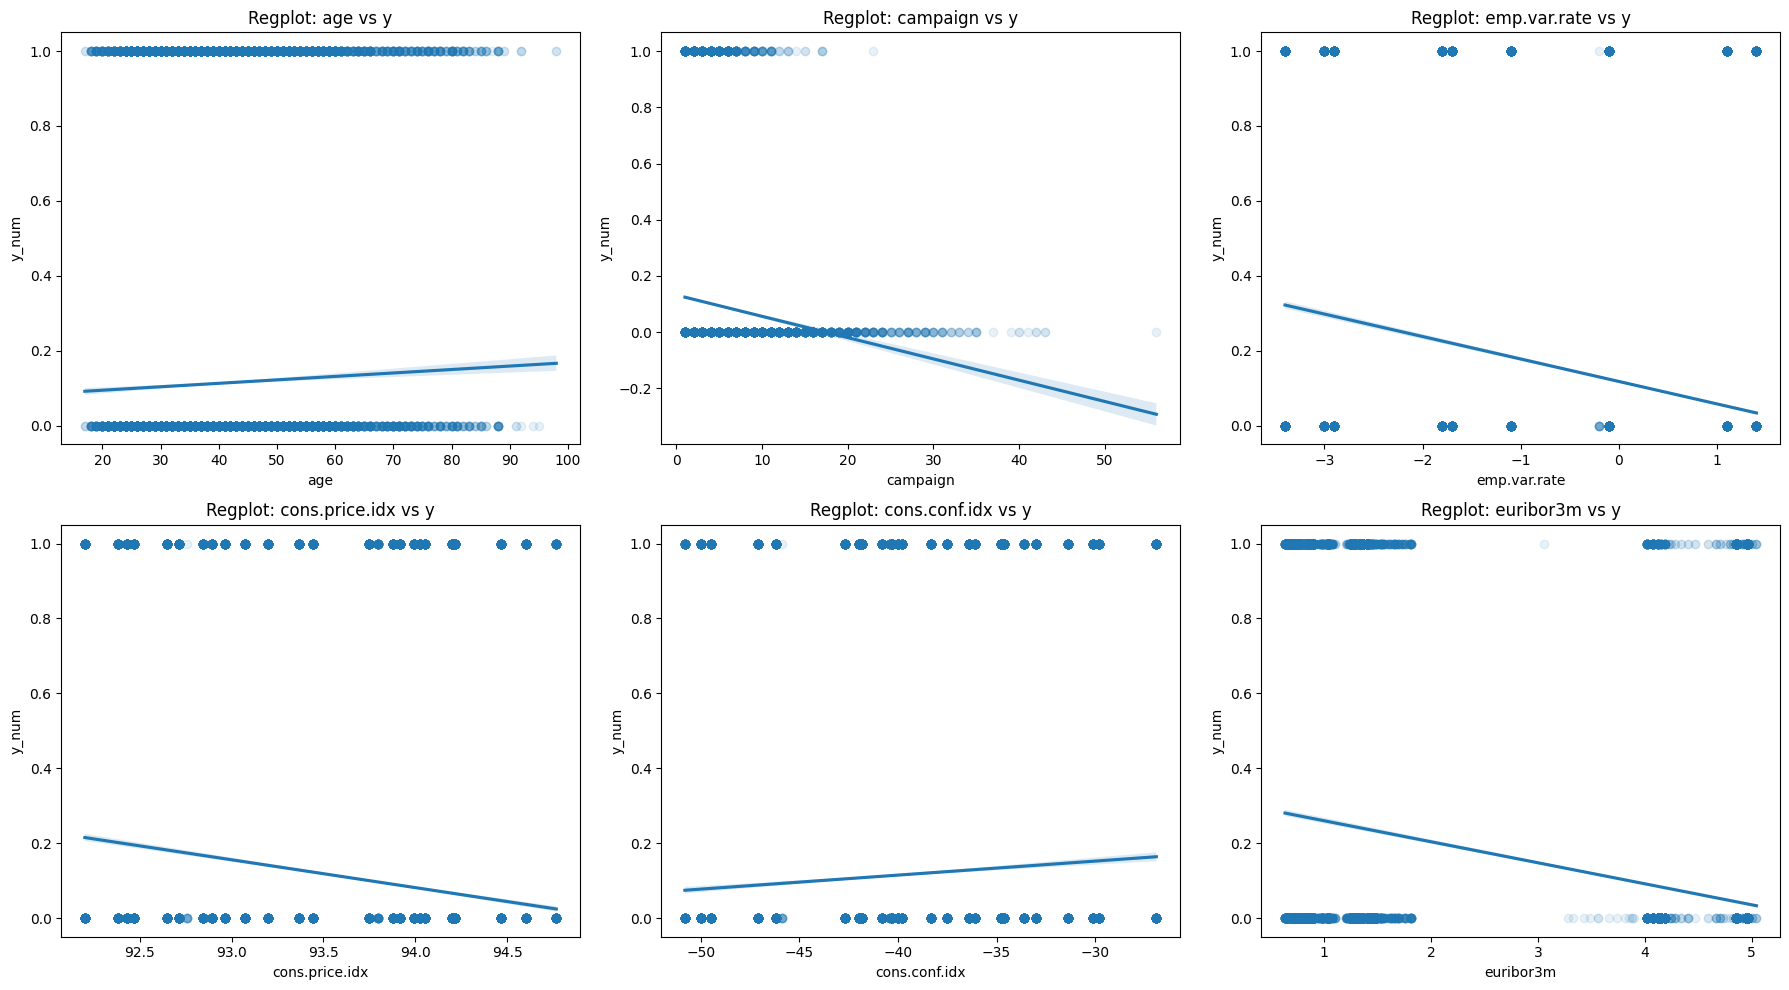

In [ ]:
# ANALISIS NUMERICO / NUMERICO
df = total_data.copy()
df['y_num'] = df['y'].map({'no': 0, 'yes': 1}) #defino "no" = 0 y "yes"= 1

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# age
sns.regplot(x=df['age'], y=df['y_num'], ax=axes[0, 0], scatter_kws={'alpha':0.1})
axes[0, 0].set_title('Regplot: age vs y')

# campaign
sns.regplot(x=df['campaign'], y=df['y_num'], ax=axes[0, 1], scatter_kws={'alpha':0.1})
axes[0, 1].set_title('Regplot: campaign vs y')

# emp.var.rate
sns.regplot(x=df['emp.var.rate'], y=df['y_num'], ax=axes[0, 2], scatter_kws={'alpha':0.1})
axes[0, 2].set_title('Regplot: emp.var.rate vs y')

# cons.price.idx
sns.regplot(x=df['cons.price.idx'], y=df['y_num'], ax=axes[1, 0], scatter_kws={'alpha':0.1})
axes[1, 0].set_title('Regplot: cons.price.idx vs y')

# cons.conf.idx
sns.regplot(x=df['cons.conf.idx'], y=df['y_num'], ax=axes[1, 1], scatter_kws={'alpha':0.1})
axes[1, 1].set_title('Regplot: cons.conf.idx vs y')

# euribor3m
sns.regplot(x=df['euribor3m'], y=df['y_num'], ax=axes[1, 2], scatter_kws={'alpha':0.1})
axes[1, 2].set_title('Regplot: euribor3m vs y')

plt.tight_layout()
plt.show()

Analisis de resultado:
a) age vs y
Observación común: Puede haber una ligera tendencia positiva o negativa, pero normalmente la edad no es un predictor fuerte por si sola.
b) campaign vs y
Hay una relación negativa, pero no muy fuerte.
c) emp.var.rate vs y
Puede haber una relación, pero no es concluyente.
d) cons.price.idx vs y
Es plana, no ess concluyente para el modelo.
e) cons.conf.idx vs y
Puede haber una ligera relacion, pero no es muy fuerte
f) euribor3m vs y
Hay una relación negativa, pero no es concluyente.

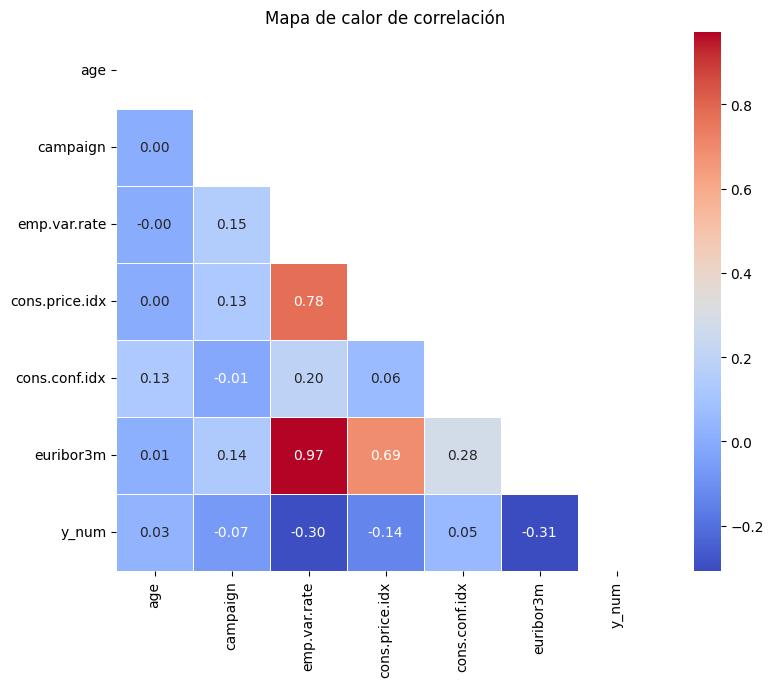

In [ ]:
# correlacion de todas las variables numericas 
corr = df[numericas + ['y_num']].corr()

mask = np.triu(np.ones_like(corr, dtype=bool)) # mascara para mostrar la mitad simetrica

plt.figure(figsize=(10, 7))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=0.5)
plt.title('Mapa de calor de correlación')
plt.show()

Analisis de resultado:
La mayoria de las variables numericas tienen baja correlacion con la target (valores cercanos a 0) osea 
que la relacion entre las variables numéricas y la target es debil e incluso negativa.

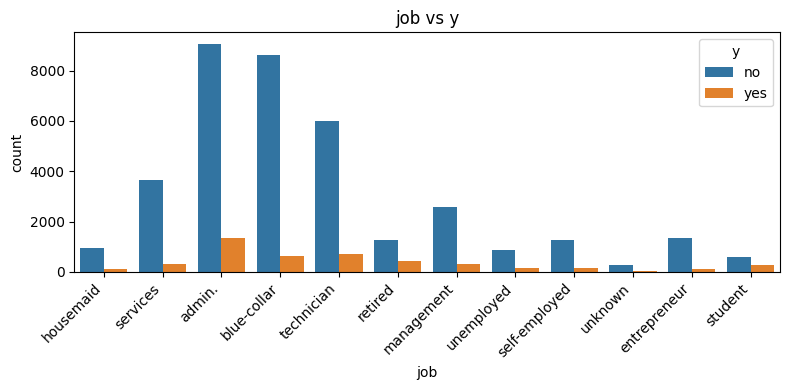

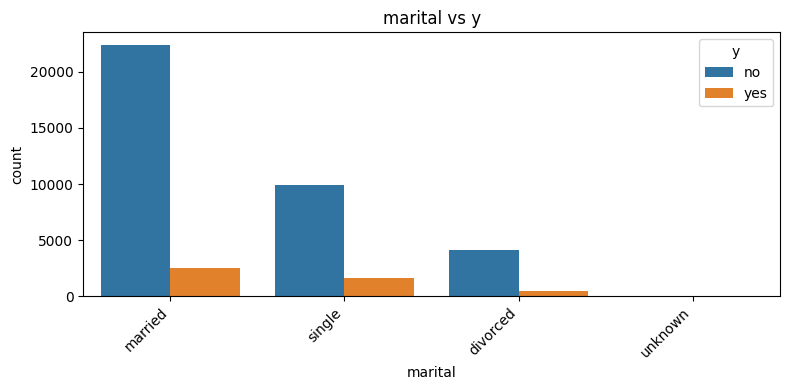

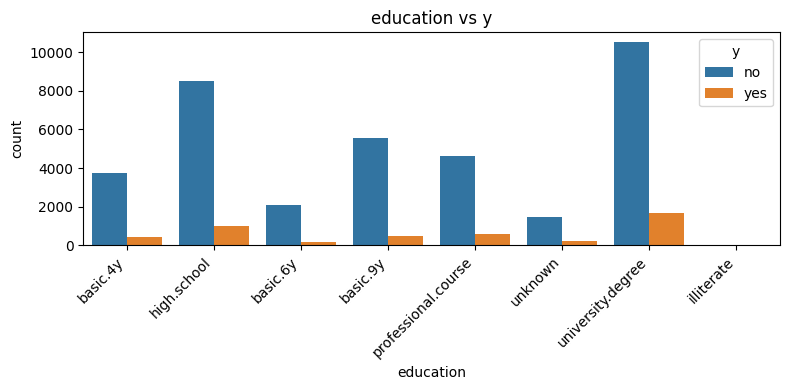

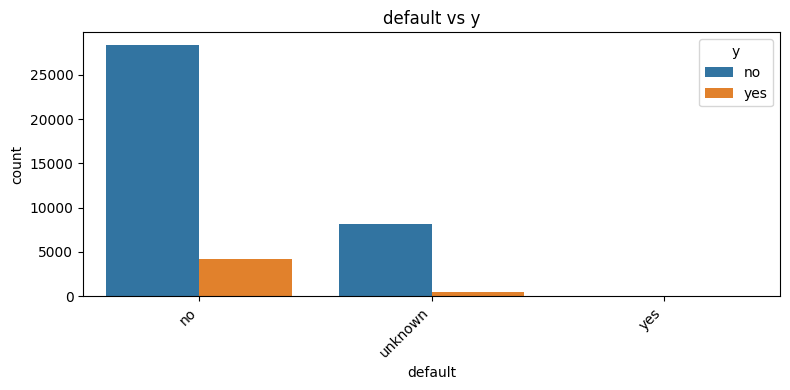

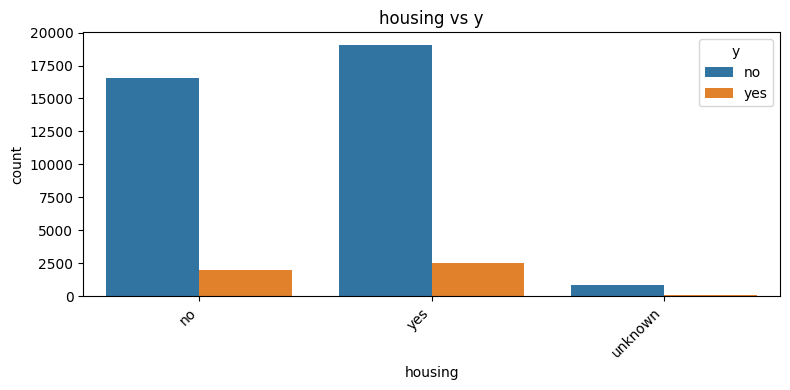

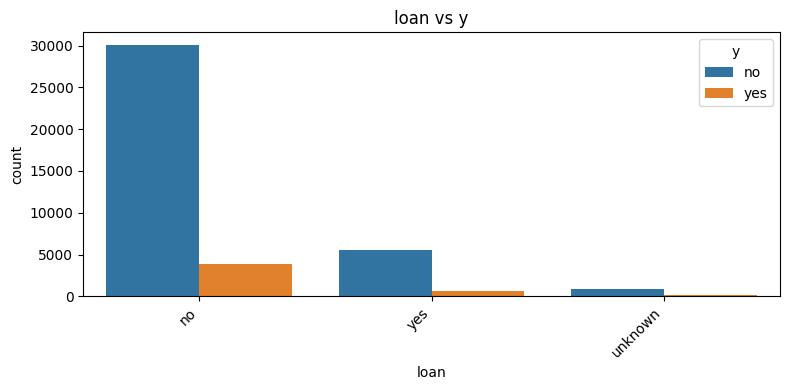

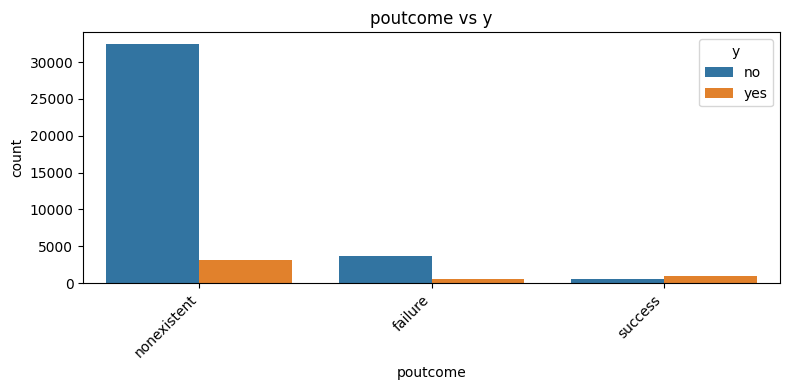

In [ ]:
#ANALISIS CATEGORICO CATEGORICO 
# job vs y
plt.figure(figsize=(8, 4))
sns.countplot(data=total_data, x='job', hue='y')
plt.title('job vs y')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# marital vs y
plt.figure(figsize=(8, 4))
sns.countplot(data=total_data, x='marital', hue='y')
plt.title('marital vs y')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# education vs y
plt.figure(figsize=(8, 4))
sns.countplot(data=total_data, x='education', hue='y')
plt.title('education vs y')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# default vs y
plt.figure(figsize=(8, 4))
sns.countplot(data=total_data, x='default', hue='y')
plt.title('default vs y')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# housing vs y
plt.figure(figsize=(8, 4))
sns.countplot(data=total_data, x='housing', hue='y')
plt.title('housing vs y')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# loan vs y
plt.figure(figsize=(8, 4))
sns.countplot(data=total_data, x='loan', hue='y')
plt.title('loan vs y')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# poutcome vs y
plt.figure(figsize=(8, 4))
sns.countplot(data=total_data, x='poutcome', hue='y')
plt.title('poutcome vs y')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Analisis de resultado:
1. job vs y
Algunas profesiones como "student" y "retired" tienen una proporción mayor de respuestas "yes" (aceptaron la campaña), mientras que profesiones como "blue-collar" y "housemaid" tienen una proporcion mucho menor de "yes".
El tipo de trabajo es un factor importante: ciertos trabajos estan mas dispuestos a aceptar la campaña.
2. marital vs y
Los clientes "single" suelen tener una proporción de "yes" mayor que los "married" o "divorced". Sin embargo, la mayoria de los clientes son "married", por lo que la cantidad total de "no" es mayor en ese grupo.
El estado civil influye, aunque no de manera tan marcada como el tipo de trabajo. Los solteros son un poco mas receptivos a la campaña.
3. education vs y
Los clientes con "university.degree" o "professional.course"  tienen una mayor proporcion de "yes" los de "unknown" o "basic.4y" tienen menos respuestas positivas.
El nivel educativo esta relacionado con la probabilidad de aceptar la campaña.
4. default vs y
Casi todos los clientes tienen "no" en default osea que no tienen impagos. Los pocos que tienen "yes" o "unknown" muestran muy pocas respuestas "yes".
5. housing vs y
La proporción de "yes" y "no" es similar tanto para quienes tienen hipoteca como para quienes no.
Tener o no hipoteca no afecta la decision de aceptar la campaña.
6. loan vs y
Al igual que housing, la proporción de "yes" es baja y similar en los dos grupos.
Esta variable tampoco es relevante para predecir la respuesta.
7. poutcome vs y
Los clientes con "success" en campañas anteriores tienen una proporcion mucho mayor de "yes" en la campaña actual. Los de "nonexistent" o "failure" tienen menos respuestas positivas.
si un cliente aceptó antes, es mucho mas probable que acepte de nuevo.

In [ ]:
# DATASET SIN OUTLAIERS 

# Crea una copia del dataset original
total_data_no_outliers = total_data.copy()

# Reemplaza outliers con los valores limites para cada variable numerica
for var in numericas:
    Q1 = total_data_no_outliers[var].quantile(0.25)
    Q3 = total_data_no_outliers[var].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Reemplaza valores fuera de los limites
    total_data_no_outliers[var] = total_data_no_outliers[var].clip(lower=lower_bound, upper=upper_bound)

print("Shape original:", total_data.shape)
print("Shape sin outliers:", total_data_no_outliers.shape)



Shape original: (41176, 14)
Shape sin outliers: (41176, 14)


In [ ]:
# DATASET CON OUTLAIERS FACTORIZADO
total_data_factorized = total_data.copy()

for col in no_numericas:
    total_data_factorized[col], _ = pd.factorize(total_data_factorized[col])

total_data_factorized.shape

(41176, 14)

In [ ]:
# DATASET SIN OUTLAIERS FACTORIZADO
total_data_no_outliers_factorized = total_data_no_outliers.copy()

# Factorizo solo las columnas categoricas indicadas en no_numericas
for col in no_numericas:
    total_data_no_outliers_factorized[col], _ = pd.factorize(total_data_no_outliers_factorized[col])
total_data_no_outliers_factorized.shape

(41176, 14)

In [ ]:
# DATASET TRAIN/TEST CON OUTLAIERS
X = total_data.drop(columns=['y'])
y = total_data['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# DATASET TRAIN/TEST SIN OUTLAIERS
X = total_data_no_outliers.drop(columns=['y'])
y = total_data_no_outliers['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# DATASET TRAIN/TEST FACTORIZADO CON OUTLAIERS
X = total_data_factorized.drop(columns=['y'])
y = total_data_factorized['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# DATASET TRAIN/TEST FACTORIZADO SIN OUTLAIERS
X = total_data_no_outliers_factorized.drop(columns=['y'])
y = total_data_no_outliers_factorized['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# DATASET CON OUTLAIERS ESTANDARIZADO 
total_data_standard = total_data.copy()

# columnas numericas excepto la target 'y'
cols_to_scale = total_data_standard.drop(columns=['y']).select_dtypes(include=['number']).columns
scaler = StandardScaler()
# Aplicar scaler solo a las columnas numericas
total_data_standard[cols_to_scale] = scaler.fit_transform(total_data_standard[cols_to_scale])

In [ ]:
# DATASET SIN OUTLAIERS ESTANDARIZADO 
total_data_no_outliers_standard = total_data_no_outliers.copy()
cols_to_scale = total_data_no_outliers_standard.drop(columns=['y']).select_dtypes(include=['number']).columns
scaler = StandardScaler()
total_data_no_outliers_standard[cols_to_scale] = scaler.fit_transform(total_data_no_outliers_standard[cols_to_scale])

In [ ]:
# DATASET CON OUTLAIERS FACTORIZADO ESTANDARIZADO
total_data_factorized_standard = total_data_factorized.copy()
cols_to_scale = total_data_factorized_standard.drop(columns=['y']).select_dtypes(include=['number']).columns
scaler = StandardScaler()
total_data_factorized_standard[cols_to_scale] = scaler.fit_transform(total_data_factorized_standard[cols_to_scale])

In [ ]:
# DATASET SIN OUTLAIERS FACTORIZADO ESTANDARIZADO
total_data_no_outliers_factorized_standard = total_data_no_outliers_factorized.copy()
cols_to_scale = total_data_no_outliers_factorized_standard.drop(columns=['y']).select_dtypes(include=['number']).columns
scaler = StandardScaler()
total_data_no_outliers_factorized_standard[cols_to_scale] = scaler.fit_transform(total_data_no_outliers_factorized_standard[cols_to_scale])

In [ ]:
# DATASET CON OUTLAIERS MIN/MAX 
total_data_minmax = total_data.copy()
cols_to_scale = total_data_minmax.drop(columns=['y']).select_dtypes(include=['number']).columns
scaler = MinMaxScaler()
total_data_minmax[cols_to_scale] = scaler.fit_transform(total_data_minmax[cols_to_scale])

In [ ]:
# DATASET SIN OUTLAIERS MIN/MAX 
total_data_no_outliers_minmax = total_data_no_outliers.copy()
cols_to_scale = total_data_no_outliers_minmax.drop(columns=['y']).select_dtypes(include=['number']).columns
scaler = MinMaxScaler()
total_data_no_outliers_minmax[cols_to_scale] = scaler.fit_transform(total_data_no_outliers_minmax[cols_to_scale])

In [ ]:
# DATASET CON OUTLAIERS FACTORIZADO MIN/MAX
total_data_factorized_minmax = total_data_factorized.copy()
cols_to_scale = total_data_factorized_minmax.drop(columns=['y']).select_dtypes(include=['number']).columns
scaler = MinMaxScaler()
total_data_factorized_minmax[cols_to_scale] = scaler.fit_transform(total_data_factorized_minmax[cols_to_scale])

In [ ]:
# DATASET SIN OUTLAIERS FACTORIZADO MIN/MAX
total_data_no_outliers_factorized_minmax = total_data_no_outliers_factorized.copy()
cols_to_scale = total_data_no_outliers_factorized_minmax.drop(columns=['y']).select_dtypes(include=['number']).columns
scaler = MinMaxScaler()
total_data_no_outliers_factorized_minmax[cols_to_scale] = scaler.fit_transform(total_data_no_outliers_factorized_minmax[cols_to_scale])

In [ ]:
#Verfico el tamaño
print(total_data.shape) # dataset con outlaiers
print(total_data_no_outliers.shape) # dataset sin outlaiers
print(total_data_factorized.shape) # dataset con outlaiers factorizado 
print(total_data_no_outliers_factorized.shape) # dataset sin outlaiers factorizado 
#train / test total_data # dataset con outlaiers
#train / test total_data_no_outliers # dataset sin outlaiers
#train / test total_data_factorized # dataset con outlaiers factorizado 
#train / test total_data_no_outliers_factorized # dataset sin outlaiers factorizado 
print(total_data_standard.shape)
print(total_data_no_outliers_standard.shape)
print(total_data_factorized_standard.shape)
print(total_data_no_outliers_factorized_standard.shape)
print(total_data_minmax.shape)
print(total_data_no_outliers_minmax.shape)
print(total_data_factorized_minmax.shape)
print(total_data_no_outliers_factorized_minmax.shape)


(41176, 14)
(41176, 14)
(41176, 14)
(41176, 14)
(41176, 14)
(41176, 14)
(41176, 14)
(41176, 14)
(41176, 14)
(41176, 14)
(41176, 14)
(41176, 14)


In [ ]:
# TRAIN/TEST DATASET CON OUTLAIERS FACTORIZADO

X_factorized = total_data_factorized.drop(columns=['y'])
y_factorized = total_data_factorized['y']

X_train_factorized, X_test_factorized, y_train_factorized, y_test_factorized = train_test_split(
    X_factorized, y_factorized, test_size=0.2, random_state=42
)


In [ ]:
# TRAIN/TEST DATASET SIN OUTLAIERS FACTORIZADO

X_no_outliers = total_data_no_outliers_factorized.drop(columns=['y'])
y_no_outliers = total_data_no_outliers_factorized['y']

X_train_no_outliers, X_test_no_outliers, y_train_no_outliers, y_test_no_outliers = train_test_split(
    X_no_outliers, y_no_outliers, test_size=0.2, random_state=42
)


In [ ]:
def evaluar_accuracy(dataset, target='y',test_size=0.2, random_state=42):
    X = dataset.drop(columns=[target])
    y = dataset[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    return accuracy_score(y_test, y_pred)

# Creo un diccionario 
datasets = {'total_data_factorized': total_data_factorized,
    'total_data_no_outliers_factorized':total_data_no_outliers_factorized,
    'total_data_factorized_standard': total_data_factorized_standard,
    'total_data_no_outliers_factorized_standard':total_data_no_outliers_factorized_standard,
    'total_data_factorized_minmax': total_data_factorized_minmax,
    'total_data_no_outliers_factorized_minmax': total_data_no_outliers_factorized_minmax}

for name, data in datasets.items():
        acc = evaluar_accuracy(data)
        print(f'Accuracy de {name}: {acc.4f}')


Accuracy de total_data_factorized: 0.8912093249150073
Accuracy de total_data_no_outliers_factorized: 0.8891452161243322
Accuracy de total_data_factorized_standard: 0.8912093249150073
Accuracy de total_data_no_outliers_factorized_standard: 0.8913307430791646
Accuracy de total_data_factorized_minmax: 0.8907236522583779
Accuracy de total_data_no_outliers_factorized_minmax: 0.8912093249150073


Analisis de resultado: 
El data set con mayor accuracy de total_data_no_outliers_factorized_standard: 0.8913 fue el data fren que no tiene  outlaiers fue factorizado y estandarizado, tiene un 89% de efectvidad.
